# Analysis of Fandango rating system after Hickey's analysis

### About Project:

This project is about carrying forward Hickey's findings on the Fandango rating system being biased and dishonest. We test the hypotheses of Hickey on the Fandango rating system which are

    1. Improperness in rounding off the actual rating
    2. Rounding off done to the nearest whole star
    3. Bizarre rounding off of rating of a movie

### Project Goals:

We'll analyze the recent movie ratings of the Fandango rating system after Hickey's analysis and determine whether there is any change in the same.

In [157]:
# Read in and explore briefly the two data sets (fandango_score_comparison.csv and movie_ratings_16_17.csv) to understand their structure. You can find the documentation of both data sets in the GitHub repositories we linked to above.

import pandas as pd

df_1 = pd.read_csv('fandango_score_comparison.csv')

df_2 = pd.read_csv('movie_ratings_16_17.csv')

df_1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [158]:
df_2.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [159]:
# Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

# For the data set with ratings previous to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.
# For the other data set, select the the following columns: 'movie', 'year', 'fandango'.

select_1 = df_1[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
select_2 = df_2[['movie', 'year', 'fandango']].copy()

In [160]:
select_1

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [161]:
select_2

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


**Define the population of interest for our goal — remember that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.**

The population of interest is made of all the movie ratings stored in the Fandango's website. We need to sample the population at previous Hickey's analysis and after Hickey's analysis.

The sample was taken previous to the analysis and the other after the analysis.

**By reading the README.md files of the two repositories, figure out whether the two samples are representative for the population we're trying to describe.**

From Hickey's article and README.md file, we can see that the following sampling criteria was used.

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling
- The movie must have had tickets on sale in 2015

**Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?**

Since almost every movie had a chance to be included in the sample, the sampling wasn't random. The movies that had under 30 fan ratings were not included.

**Change slightly the current goal of our analysis such that:**

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

We'll determine whether there are any changes in Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

This would be a fairly good proxy for the Fandango's rating system after Hickey's analysis.

**Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.**

We need to isolate the two populations of interest which are. I. Fandango's ratings for popular movies released in 2015 and II. Fandango's ratings for popular movies released in 2016.

**One of the data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.**

The sampling criteria is movie popularity and it doesn't provide information about the number of ratings. This sample may or may not contain movies with over 30 fan ratings. To check representativity of sample, we sample randomly 10 movies and check the number of ratings on Fandango's website.

In [162]:
select_2.sample(10, random_state=41)

,movie,year,fandango
194,The Shack,2017,4.5
67,Hands of Stone,2016,4.0
38,Criminal,2016,4.0
142,Shut In,2016,3.0
124,Norm of the North,2016,3.0
30,Cafe Society,2016,3.5
101,Loving,2016,4.0
14,Assassin's Creed,2016,4.0
29,Cabin Fever,2016,4.0
174,The Finest Hours,2016,4.0


As of May 2021, these are the fan ratings for the above movies are follows

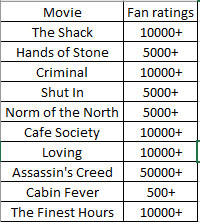

95% of the movies are popular. We can double check with the other data for popular movies.

In [163]:
sum(select_1['Fandango_votes']<30)

0

There are movies with releasing year different than 2015 and 2016. For our purpose we'll isolate only the movies released in 2015 and 2016. 

We'll start with Hickey's dataset and isolate movies released in respective years. We'll extract it from the FILM column.

In [164]:
# If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

select_1['Year'] = select_1['FILM'].str[-5:-1]

In [165]:
select_1['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [166]:
# Isolate the movies released in 2015 in a separate data set.

fandango_2015 = select_1[select_1['Year'] == '2015'].copy()

In [167]:
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [168]:
# Isolate the movies released in 2016 in another separate data set.

fandango_2016 = select_2[select_2['year'] == 2016].copy()

In [169]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [170]:
# Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. Customize the graph such that:

# It has a title with an increased font size.
# It has labels for both the x and y-axis.
# It has a legend which explains which distribution is for 2015 and which is for 2016.
# The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.
# The tick labels of the x-axis are: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0].
# It has the fivethirtyeight style (this is optional). You can change to this style by using plt.style.use('fivethirtyeight'). This line of code must be placed before the code that generates the kernel density plots.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

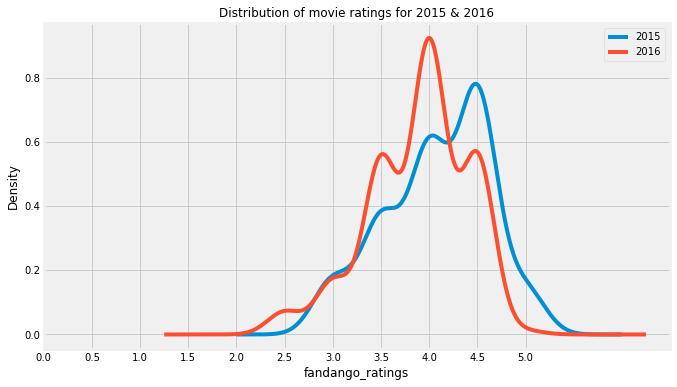

In [171]:
fandango_2015['Fandango_Stars'].plot.kde(figsize=(10,6), label=2015)
fandango_2016['fandango'].plot.kde(label = 2016)
plt.title('Distribution of movie ratings for 2015 & 2016', fontdict = {'fontsize':12})
plt.xlabel('fandango_ratings')
plt.legend()
plt.xticks(ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.style.use('fivethirtyeight')
plt.show()

**Analyze the two kernel density plots. Try to answer the following questions:**

**What is the shape of each distribution?**

The distribution for 2015 is left-skewed wheras the distribution for 2016 is symmetrical normal distribution.

**How do their shapes compare?**

Their shapes have different distribution patterns with peaks at ratings 4.0 and 4.5 respectively

**If their shapes are similar, is there anything that clearly differentiates them?**

The slight left shift in the 2016 distribution shows that the ratings were lower in 2016 compared to 2015

**Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?**

Yes from the shapes of the curves, the ratings for 2016 were lower compared to ratings for 2015

**Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?**

Movies in 2016 were rated slightly lower compared to movies in 2015

In [172]:
# Examine the frequency distribution tables of the two distributions.

# The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
# If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?

# 2015

fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [173]:
# 2016

fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

**Analyze the two tables and try to answer the following questions:**

**Is it still clear that there is a difference between the two distributions?**

There were significantly lower ratings in 2016 when compared to ratings in 2015. Lower ratings in 2015 were 3.0 compared to 2016 where it was 2.5. The high ratings in 2015 were concentrated at 4.5 whereas the high ratings in 2016 were concentrated at 4.0.

**What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?**

We can examine the direction of change using summary metrics.

In [174]:
fandango_2015['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [175]:
fandango_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [176]:
# Compute the mean, median, and mode for each distribution.

import numpy as np

mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

In [177]:
stats = pd.DataFrame()
stats['2015'] = [mean_2015,median_2015,mode_2015]
stats['2016'] = [mean_2016,median_2016,mode_2016]
stats.index = ['mean','median','mode']
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


**Compare these metrics and determine what they tell about the direction of the difference**

From the table above. There is a slight high rating for 2015 from 2016

**What's magnitude of the difference? Is there a big difference or just a slight difference?**

The difference is slight but significant in movie ratings

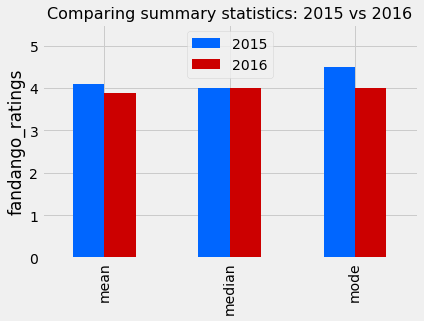

In [191]:
# Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016. You should arrive at a graph that looks similar (not necessarily identical) to this:

plt.style.use('fivethirtyeight')
stats.plot.bar(color=['#0066FF','#CC0000'])
plt.title('Comparing summary statistics: 2015 vs 2016',fontdict = {'fontsize':16})
plt.ylim(0,5.5)
plt.ylabel('fandango_ratings')
plt.legend(loc='upper center')
plt.show()

# Conclusion

The popular movies released in 2015 were rated higher than the ones rated in 2016.

The reason can be attributed to Fandango fine tuning the rating system after analysis by Hickey.